In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_aisles = pd.read_csv("./data/aisles/aisles.csv")
df_departments = pd.read_csv("./data/departments/departments.csv")
df_order_products = pd.read_csv("./data/order_products/order_products.csv")
df_orders = pd.read_csv("./data/orders/orders.csv")
df_products = pd.read_csv("./data/products/products.csv")

In [3]:
df1 = pd.merge(df_orders, df_order_products, on="order_id", how="inner")
df2 = pd.merge(df1, df_products, on="product_id")
df3 = pd.merge(df2, df_aisles, on="aisle_id")
df_all = pd.merge(df3, df_departments, on="department_id")
df_all

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7,soft drinks,beverages
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,soft drinks,beverages
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,soft drinks,beverages
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,soft drinks,beverages
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2939884,130327,3,1,13,0.0,27414,5,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819102,3267360,150683,1,5,16,NaN,27414,13,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819103,414077,159238,9,6,12,8.0,27414,1,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819104,813243,171675,13,2,6,13.0,27414,34,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk


In [4]:
df_new = df_all[['user_id', 'aisle']]
df_value_count = df_new.groupby(['user_id', 'aisle']).size().reset_index(name='value_count')
df_value_count

,user_id,aisle,value_count
0,1,candy chocolate,2
1,1,cereal,4
2,1,cream,3
3,1,fresh fruits,5
4,1,milk,1
...,...,...,...
5919835,206209,soft drinks,11
5919836,206209,soy lactosefree,10
5919837,206209,spices seasonings,1
5919838,206209,trash bags liners,1


In [5]:
pivot_df = df_value_count.pivot(index='user_id', columns='aisle', values='value_count')
 
pivot_df

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
206206,NaN,4.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,2.0,1.0,NaN,NaN,11.0,NaN,15.0


In [7]:
df = pivot_df.fillna(0)
df

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,2.0,1.0,0.0,0.0,11.0,0.0,15.0


In [159]:
X = df.values
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  3.,  0., ...,  2.,  0., 42.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 11.,  0., 15.],
       [ 0.,  3.,  0., ...,  0.,  0., 33.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.]])

## Log Transformation

In [74]:
log_X = np.log(1+X)
log_X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.09861229],
       [0.        , 1.38629436, 0.        , ..., 1.09861229, 0.        ,
        3.76120012],
       [0.        , 0.        , 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.48490665, 0.        ,
        2.77258872],
       [0.        , 1.38629436, 0.        , ..., 0.        , 0.        ,
        3.52636052],
       [0.        , 0.69314718, 0.        , ..., 0.        , 0.        ,
        1.38629436]])

In [107]:
X_scaler = StandardScaler().fit_transform(log_X) 

print(X_scaler)

[[-0.19837813 -0.53959644 -0.1177614  ... -0.8020072  -0.15730356
  -0.09219609]
 [-0.19837813  1.74137946 -0.1177614  ...  0.21106759 -0.15730356
   2.06752922]
 [-0.19837813 -0.53959644 -0.1177614  ...  0.21106759 -0.15730356
  -0.9833219 ]
 ...
 [-0.19837813 -0.53959644 -0.1177614  ...  1.48942564 -0.15730356
   1.26562927]
 [-0.19837813  1.74137946 -0.1177614  ... -0.8020072  -0.15730356
   1.87704198]
 [-0.19837813  0.60089151 -0.1177614  ... -0.8020072  -0.15730356
   0.14115368]]


In [108]:
pca = PCA(n_components = 2)
pca.fit(X_scaler)
x_pca = pca.transform(X_scaler)

In [109]:
x_pca

array([[-3.22857633,  0.93324297],
       [ 1.73103311,  0.06164909],
       [-2.39965523, -0.68057794],
       ...,
       [ 3.86406486, -2.84448507],
       [11.76807172, -3.69274602],
       [ 1.76050489,  0.70767391]])

In [111]:
pca_df = pd.DataFrame(x_pca,columns=['principle component 1','principle component 2'])
pca_df.head()


,principle component 1,principle component 2
0,-3.228576,0.933243
1,1.731033,0.061649
2,-2.399655,-0.680578
3,-4.439761,1.202410
4,-3.016451,-0.753325


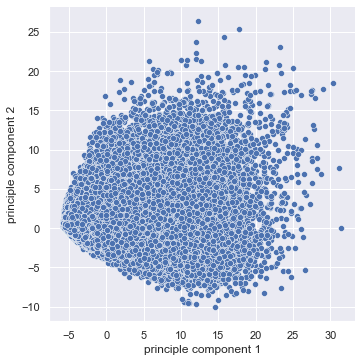

In [112]:
sns.relplot(x = "principle component 1", y = 'principle component 2',data=pca_df)

In [113]:
x = pca_df.copy()

In [114]:
kmeans = KMeans(n_clusters=3, random_state=9)
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [115]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

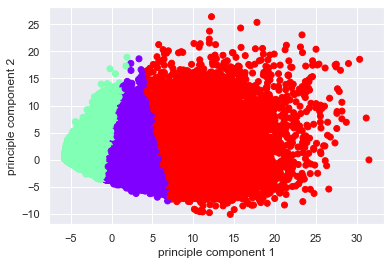

In [116]:
plt.scatter(clusters["principle component 1"], clusters["principle component 2"], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel('principle component 2')
plt.show()

In [117]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_pca)
x_scaled

array([[-0.72520853,  0.3968772 ],
       [ 0.38882772,  0.02621731],
       [-0.53901481, -0.28942717],
       ...,
       [ 0.86795309, -1.20966491],
       [ 2.64336512, -1.57040209],
       [ 0.39544773,  0.30095018]])

In [118]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[412418.00000000093,
 274191.26380846853,
 165764.7921049288,
 132961.31712873865,
 105400.31069641153,
 91288.2009421882,
 79843.21140398276,
 70586.57808691998,
 62682.16869864324,
 57342.164812889474,
 52695.76164796212,
 48248.28014674359,
 44896.343998022734,
 41802.528829425006,
 39446.94597717443,
 37115.027484308164,
 34953.06883194989,
 33078.164930009974,
 31583.117167926852,
 30088.075613965764,
 28801.607896588674,
 27435.411725534876,
 26320.8823692523,
 25364.87513312904,
 24431.17483853664,
 23634.663816079963,
 22809.43734417784,
 22033.980093057304,
 21340.587419852356]

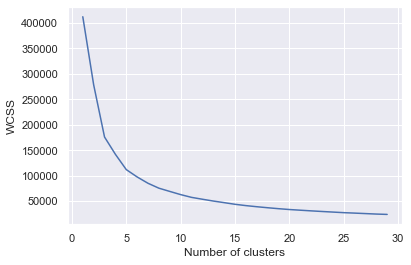

In [57]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
kmeans_new = KMeans(5)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.shape

(206209, 3)

In [120]:
cluster_new.head(10)

,principle component 1,principle component 2,cluster_pred
0,-3.228576,0.933243,1
1,1.731033,0.061649,4
2,-2.399655,-0.680578,1
3,-4.439761,1.202410,1
4,-3.016451,-0.753325,1
5,-4.683068,-0.687035,1
6,1.427436,-1.389440,4
7,-2.512492,-2.011908,4
8,-1.248461,-0.022393,1
9,0.494699,-3.091303,4


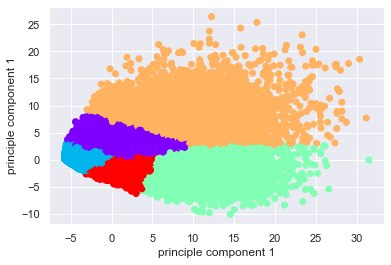

In [121]:
plt.scatter(cluster_new["principle component 1"], cluster_new["principle component 2"], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel("principle component 1")
plt.show()

In [123]:
cluster_new.index = range(1, 206210)
cluster_new

,principle component 1,principle component 2,cluster_pred
1,-3.228576,0.933243,4
2,1.731033,0.061649,0
3,-2.399655,-0.680578,4
4,-4.439761,1.202410,4
5,-3.016451,-0.753325,4
...,...,...,...
206205,-2.789234,-1.094947,4
206206,5.209735,2.085978,3
206207,3.864065,-2.844485,0
206208,11.768072,-3.692746,2


In [124]:
df_full = pd.concat([df, cluster_new], axis=1)
df_full

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.228576,0.933243,4
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.731033,0.061649,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.399655,-0.680578,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-4.439761,1.202410,4
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.016451,-0.753325,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-2.789234,-1.094947,4
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.209735,2.085978,3
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,3.864065,-2.844485,0
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,11.768072,-3.692746,2


In [161]:
log_cluster0 = df_full.loc[bydf_full["cluster_pred"] == 0]
log_cluster0

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.016451,-0.753325,4
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.427436,-1.389440,0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.512492,-2.011908,0
9,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,28.0,-1.248461,-0.022393,4
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.494699,-3.091303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206198,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.866371,0.134091,4
206202,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,0.0,4.0,0.281750,-1.067233,0
206203,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.745353,-1.906485,0
206204,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.861864,0.035559,4


In [162]:
log_cluster1 = bydf_full.loc[bydf_full["cluster_pred"] == 1]
log_cluster1

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.587181,0.572116,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.975223,2.699752,1
17,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,32.0,6.0,0.994668,2.609208,1
21,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,13.0,4.0,14.0,1.071121,2.777173,1
23,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,12.0,-0.896526,2.623632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,0.0,18.0,-0.920612,0.750218,1
206153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.371781,3.141648,1
206168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,0.0,5.0,0.249712,1.491419,1
206182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.460928,2.046409,1


In [163]:
log_cluster2 = bydf_full.loc[bydf_full["cluster_pred"] == 2]
log_cluster2

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,8.0,4.051729,-1.904044,2
38,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21.0,0.0,1.0,3.358340,-1.869207,2
43,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,4.042207,-0.619439,2
54,1.0,8.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,44.0,0.0,7.0,9.278056,-1.389338,2
63,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,23.0,6.818484,-2.919339,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,0.0,49.0,5.723513,-0.295145,2
206200,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,2.0,2.504082,-2.406186,2
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,4.397670,-3.005511,2
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,8.316069,-2.644416,2


In [164]:
log_cluster3 = bydf_full.loc[bydf_full["cluster_pred"] == 3]
log_cluster3

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
14,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.161788,2.068198,3
19,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,0.0,1.0,3.0,0.0,0.0,5.0,7.251999,4.251597,3
29,1.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,1.0,2.888277,4.759789,3
61,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,2.0,0.0,7.0,3.996961,3.530407,3
117,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.319097,9.485502,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,6.0,3.0,0.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,...,10.0,0.0,1.0,0.0,11.0,0.0,11.0,13.762730,5.039297,3
206166,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,5.0,7.0,6.236507,6.093913,3
206185,0.0,0.0,2.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775895,5.827903,3
206201,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,7.0,0.0,0.0,7.473136,3.204854,3


In [165]:
log_cluster4 = bydf_full.loc[bydf_full["cluster_pred"] == 4]
log_cluster4

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.982559,0.690799,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.956877,-0.325296,4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.705186,-1.139112,4
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,-5.404169,2.534784,4
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.624352,0.680123,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.315451,-0.254467,4
206171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,7.0,0.0,0.0,-4.357638,1.168276,4
206172,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.399061,-0.430503,4
206173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.982174,-0.141423,4


## Binary Transformation

In [125]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  3.,  0., ...,  2.,  0., 42.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 11.,  0., 15.],
       [ 0.,  3.,  0., ...,  0.,  0., 33.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.]])

In [126]:
binary_X = np.int64(X >0)
binary_X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

In [128]:
binaryX_scaler = StandardScaler().fit_transform(binary_X) 

print(binaryX_scaler)

[[-0.22023299 -0.62324566 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ...  1.00382383 -0.18060937
   0.78838308]
 [-0.22023299 -0.62324566 -0.13254177 ...  1.00382383 -0.18060937
  -1.26841891]
 ...
 [-0.22023299 -0.62324566 -0.13254177 ...  1.00382383 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]
 [-0.22023299  1.60450376 -0.13254177 ... -0.99619074 -0.18060937
   0.78838308]]


In [129]:
pca = PCA(n_components = 2)
pca.fit(binaryX_scaler)
binaryx_pca = pca.transform(binaryX_scaler)

In [131]:
binarypca_df = pd.DataFrame(binaryx_pca,columns=['principle component 1','principle component 2'])
binarypca_df.head(10)

,principle component 1,principle component 2
0,-3.982559,0.690799
1,1.587181,0.572116
2,-2.956877,-0.325296
3,-3.975223,2.699752
4,-2.480933,-1.079852
5,-4.705186,-1.139112
6,1.150230,-1.310766
7,-1.942621,-2.734401
8,-0.588767,-0.059608
9,0.488357,-3.080992


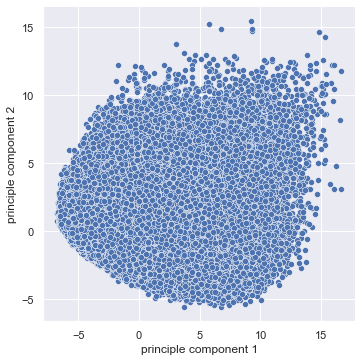

In [132]:
sns.relplot(x = "principle component 1", y = 'principle component 2',data=binarypca_df)

In [135]:
x = binarypca_df.copy()
kmeans = KMeans(n_clusters=3, random_state=9)
kmeans.fit(binarypca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [134]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

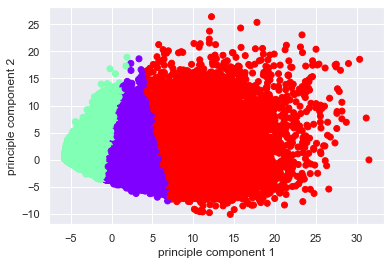

In [136]:
plt.scatter(clusters["principle component 1"], clusters["principle component 2"], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel('principle component 2')
plt.show()

In [137]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(binaryx_pca)
x_scaled

array([[-1.04226344,  0.31479673],
       [ 0.41537622,  0.26071272],
       [-0.77383533, -0.14823738],
       ...,
       [ 1.15090074, -1.36960918],
       [ 2.17637299, -1.20505837],
       [ 0.88228546, -0.01188476]])

In [138]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[412418.0000000016,
 272375.5318931593,
 162458.63328306924,
 127279.85358059229,
 105010.78157484518,
 87923.20971148714,
 76556.85387093468,
 66764.85089613938,
 60482.921891639,
 55148.38182379925,
 50306.25936398821,
 45924.90478326754,
 42342.75572650664,
 39805.32633107754,
 37281.05101545591,
 35108.13564215169,
 33172.48873673936,
 31331.521998199863,
 29838.525802340468,
 28329.685226841393,
 27143.906885878656,
 25924.45046180487,
 24946.885369786105,
 24014.959702454365,
 23017.85233223692,
 22152.64268391606,
 21295.05376033952,
 20562.994133572676,
 19957.212887820526]

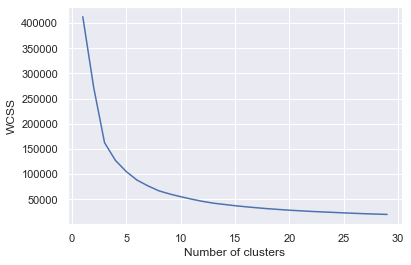

In [139]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
kmeans_new = KMeans(5)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.shape

(206209, 3)

In [145]:
cluster_new.head(10)

,principle component 1,principle component 2,cluster_pred
0,-3.982559,0.690799,4
1,1.587181,0.572116,1
2,-2.956877,-0.325296,4
3,-3.975223,2.699752,1
4,-2.480933,-1.079852,0
5,-4.705186,-1.139112,4
6,1.150230,-1.310766,0
7,-1.942621,-2.734401,0
8,-0.588767,-0.059608,0
9,0.488357,-3.080992,0


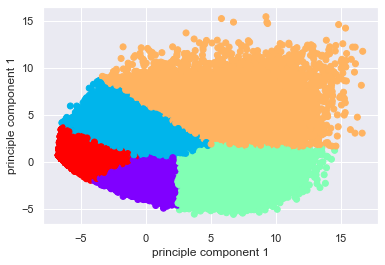

In [146]:
plt.scatter(cluster_new["principle component 1"], cluster_new["principle component 2"], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel("principle component 1")
plt.ylabel("principle component 1")
plt.show()

In [147]:
cluster_new.index = range(1, 206210)
cluster_new

,principle component 1,principle component 2,cluster_pred
1,-3.982559,0.690799,4
2,1.587181,0.572116,1
3,-2.956877,-0.325296,4
4,-3.975223,2.699752,1
5,-2.480933,-1.079852,0
...,...,...,...
206205,-2.048600,-1.821387,0
206206,5.004053,1.888450,3
206207,4.397670,-3.005511,2
206208,8.316069,-2.644416,2


In [148]:
bydf_full = pd.concat([df, cluster_new], axis=1)
bydf_full

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.982559,0.690799,4
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.587181,0.572116,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.956877,-0.325296,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.975223,2.699752,1
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.480933,-1.079852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,-2.048600,-1.821387,0
206206,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.004053,1.888450,3
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,4.397670,-3.005511,2
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,8.316069,-2.644416,2


In [154]:
cluster0 = bydf_full.loc[bydf_full["cluster_pred"] == 0]
cluster0

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-2.480933,-1.079852,0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.150230,-1.310766,0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.942621,-2.734401,0
9,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,28.0,-0.588767,-0.059608,0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.488357,-3.080992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206198,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.709596,-0.089426,0
206202,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27.0,0.0,4.0,-0.184100,0.145968,0
206203,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.976324,-2.596642,0
206204,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.114378,-0.166365,0


In [155]:
cluster1 = bydf_full.loc[bydf_full["cluster_pred"] == 1]
cluster1

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,42.0,1.587181,0.572116,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-3.975223,2.699752,1
17,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,32.0,6.0,0.994668,2.609208,1
21,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,13.0,4.0,14.0,1.071121,2.777173,1
23,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,12.0,-0.896526,2.623632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,2.0,0.0,18.0,-0.920612,0.750218,1
206153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.371781,3.141648,1
206168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,0.0,5.0,0.249712,1.491419,1
206182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.460928,2.046409,1


In [156]:
cluster2 = bydf_full.loc[bydf_full["cluster_pred"] == 2]
cluster2

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
28,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,8.0,4.051729,-1.904044,2
38,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21.0,0.0,1.0,3.358340,-1.869207,2
43,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,4.042207,-0.619439,2
54,1.0,8.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,44.0,0.0,7.0,9.278056,-1.389338,2
63,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,23.0,6.818484,-2.919339,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,0.0,49.0,5.723513,-0.295145,2
206200,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,2.0,2.504082,-2.406186,2
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,11.0,0.0,15.0,4.397670,-3.005511,2
206208,0.0,3.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,8.316069,-2.644416,2


In [157]:
cluster3 = bydf_full.loc[bydf_full["cluster_pred"] == 3]
cluster3

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
14,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.161788,2.068198,3
19,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,0.0,1.0,3.0,0.0,0.0,5.0,7.251999,4.251597,3
29,1.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,1.0,2.888277,4.759789,3
61,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,2.0,0.0,7.0,3.996961,3.530407,3
117,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.319097,9.485502,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,6.0,3.0,0.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,...,10.0,0.0,1.0,0.0,11.0,0.0,11.0,13.762730,5.039297,3
206166,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,5.0,7.0,6.236507,6.093913,3
206185,0.0,0.0,2.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775895,5.827903,3
206201,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,7.0,0.0,0.0,7.473136,3.204854,3


In [158]:
cluster4 = bydf_full.loc[bydf_full["cluster_pred"] == 4]
cluster4

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,principle component 1,principle component 2,cluster_pred
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-3.982559,0.690799,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.956877,-0.325296,4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.705186,-1.139112,4
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,-5.404169,2.534784,4
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.624352,0.680123,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.315451,-0.254467,4
206171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,7.0,0.0,0.0,-4.357638,1.168276,4
206172,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.399061,-0.430503,4
206173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.982174,-0.141423,4
